In [1]:
import matplotlib.pyplot as plt
import cv2

In [16]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

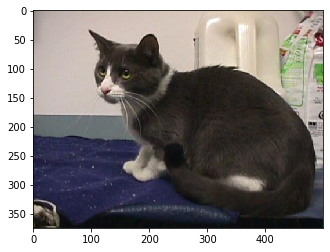

In [17]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

In [12]:
dog2 = cv2.imread('CATS_DOGS/train/Dog/2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

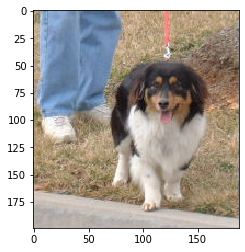

In [13]:
plt.imshow(dog2)

In [9]:
dog2.shape

(199, 188, 3)

Using built in functions from Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images such as rotating and adding noise. Network will be more robust to different images

In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
# Creating more images

image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

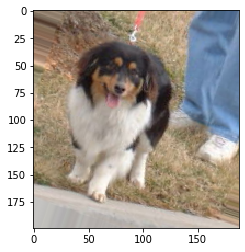

In [23]:
# Running images thru image generator
plt.imshow(image_gen.random_transform(dog2))

In [24]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [25]:
image_gen.flow_from_directory('CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


In [31]:
# width,height,channels for resizing
# making sure all images have same size
image_shape = (150,150,3)

In [26]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [27]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [32]:
train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size=image_shape[:2], #(150,150)
                                               batch_size=16,
                                               class_mode='binary') # 2 types of classes

test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=16,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [33]:
train_image_gen.class_indices # indices automatically defined from 2 folders

{'CAT': 0, 'DOG': 1}

In [36]:
results = model.fit_generator(train_image_gen,
                              epochs=1,
                              steps_per_epoch=150,             # 16 x 150 = 2400 images per epoch
                              validation_data=test_image_gen,
                              validation_steps=12)

Epoch 1/1
150/150 [==============================] - 36s 241ms/step - loss: 0.7143 - accuracy: 0.5004 - val_loss: 0.6939 - val_accuracy: 0.4740


In [38]:
results.history['accuracy']

[0.5004167]

In [39]:
# loading already trained model for 100 epochs
from keras.models import load_model

model = load_model('cat_dog_100epochs.h5')

In [40]:
# Predicting a test image of a dog

import numpy as np
from keras.preprocessing import image

dog_file = 'CATS_DOGS/train/Dog/50.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150)) # resizing 

dog_img = image.img_to_array(dog_img) # turning image to array

dog_img = np.expand_dims(dog_img, axis=0) # turning image into a batch of 1 image (1,150,150,3)
dog_img = dog_img/255 # normalizing

prediction_prob = model.predict(dog_img)

In [42]:
model.predict_classes(dog_img) # 1 for dog

array([[1]])

In [41]:
# Output prediction
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.7000223]] 
